In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
corpus = [
    'Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
    'Apple is announcing new iphone tomorrow',
    'Tesla announcing new model-3 tomorrow',
    'Google is announcing new pixels-5 tomorrow',
    'Amazon is announcing new eco=dot tomorrow',
    'i am eating biryani and you are eating grapes'
]

In [5]:
v = TfidfVectorizer()


In [6]:
trans_output = v.fit_transform(corpus)

In [7]:
print(v.vocabulary_)

{'thor': 23, 'eating': 10, 'pizza': 21, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 19, 'iphone': 14, 'tomorrow': 24, 'tesla': 22, 'model': 18, 'google': 12, 'pixels': 20, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 25, 'are': 6, 'grapes': 13}


In [8]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 

In [10]:
all_feature_name = v.get_feature_names_out()

In [13]:
for word in all_feature_name:
    index = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[index]}")

already 2.252762968495368
am 2.252762968495368
amazon 2.252762968495368
and 2.252762968495368
announcing 1.336472236621213
apple 2.252762968495368
are 2.252762968495368
ate 2.252762968495368
biryani 2.252762968495368
dot 2.252762968495368
eating 1.8472978603872037
eco 2.252762968495368
google 2.252762968495368
grapes 2.252762968495368
iphone 2.252762968495368
ironman 2.252762968495368
is 1.336472236621213
loki 2.252762968495368
model 2.252762968495368
new 1.336472236621213
pixels 2.252762968495368
pizza 2.252762968495368
tesla 2.252762968495368
thor 2.252762968495368
tomorrow 1.336472236621213
you 2.252762968495368


In [15]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [16]:
trans_output.toarray()[:2]

array([[0.24223906, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24223906, 0.        , 0.        ,
        0.39727899, 0.        , 0.        , 0.        , 0.        ,
        0.24223906, 0.14371054, 0.24223906, 0.        , 0.        ,
        0.        , 0.72671719, 0.        , 0.24223906, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.32137031,
        0.54170309, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.54170309,
        0.        , 0.32137031, 0.        , 0.        , 0.32137031,
        0.        , 0.        , 0.        , 0.        , 0.32137031,
        0.        ]])

In [17]:
import pandas as pd

In [19]:
df= pd.read_csv('Ecommerce_data.csv')

In [20]:
df.shape

(24000, 2)

In [21]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [22]:
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [31]:
df['label_num'] = df.label.map({
    'Household': 0,
    'Books': 1,
    'Clothing & Accessories': 2,
    'Electronics': 3
    
})

In [32]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,3
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [33]:
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test=train_test_split(df.Text,
                                                df.label_num,
                                                test_size=0.2,
                                                random_state=2022,
                                                stratify=df.label_num
                                               )

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_pred,y_test))

C:\Users\Amir Hamza\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1205
           1       0.95      0.97      0.96      1171
           2       0.98      0.97      0.97      1215
           3       0.97      0.96      0.97      1209

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1147,   11,   21,   21],
       [  32, 1140,   13,   15],
       [  12,    5, 1176,    7],
       [  14,   15,    5, 1166]], dtype=int64)

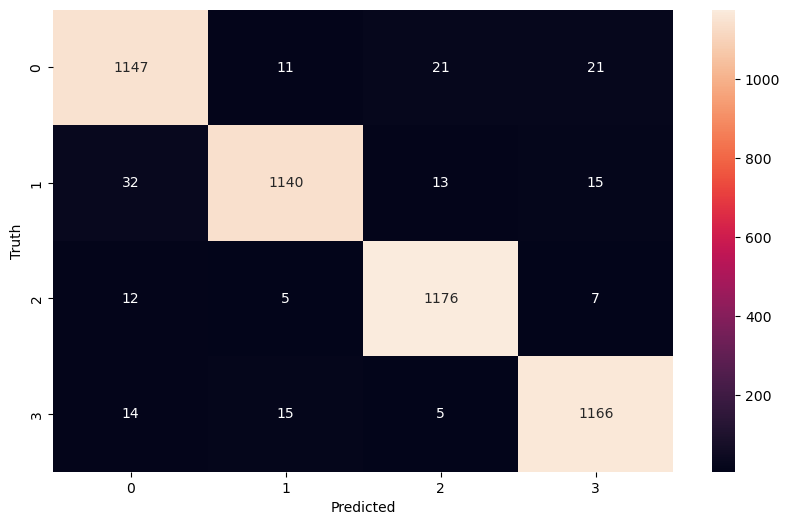

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [39]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [ ]:
df['preprocessed_text'] = df.Text.apply(preprocess)

In [ ]:
df.head()